## **Advances in Data Mining**

Stephan van der Putten | (s1528459) | stvdputtenjur@gmail.com  
Theo Baart | s2370328 | s2370328@student.leidenuniv.nl

### **Assignment 3**
This assignment is concerned with performing an analysis of and execute PageRank on the wikipedia links given in the `wikilink_graph.2004-03-01.csv` file. In order to do this the assignment is split up into four subtasks with each subtask receiving its dedicated `.ipynb` file. See each specific file for details on what this notebook accomplishes.

Note all implementations are based on the assignment guidelines and helper files given as well as the documentation of the used functions. 

#### **Exploratory Data Analysis**
This notebook performs an exploratory analysis on the dataset. This includes some anlaysis on the nodes and edges as well as estimating system requirements for being able to execute the PageRank algorithm.
___

### **Helper Functions**
This section contains functions which aid and simplify the code for our LSH implementation
___
The following snippet handles all imports.

In [247]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.sparse
from scipy.sparse import csr_matrix

The `load_prepped_data` function is responsible for retrieving the data prepped by `prep.ipynb` and loading it for exploratory data analysis.

In order to do this the function uses the following parameters:
  * `filename` - the name of the file containing the prepped data [default = `prepped-data.npz`]
  
Additionally, it returns the following value:
  * `data` - an array representing the prepped data  

In [235]:
def load_prepped_data(filename = 'prepped_data.npz'):
    data = scipy.sparse.load_npz(filename)
    return data

The following snippet triggers data loading

In [236]:
data = load_prepped_data()

The `plot_distribution` function plots the distribution of a one-dimensional sparse matrix.

In order to do this the function uses the following parameters:
  * `data` - the one-dimensional sparse matrix to be plotted
  * `title` - the title to give the plot [default = `'distribution'`]

In [373]:
def plot_distribution(data,title='distribution'):
    data = data.toarray()
#     print(data)
    plt.title(title)
#     print(data.min(),data.max())
    sns.set_style("white")
    plot = sns.distplot(data)
    plot.set(xlim={data.min()-0.5,data.max()+0.5})
    sns.despine()

The `compute_average` function computes the average value of a one-dimensional sparse matrix.

In order to do this the function uses the following parameters:
  * `data` - the one-dimensional sparse matrix we want the average of
  * `ignore_zero` - whether to ignore zeros [default = `True`]

Additionally, it returns the following value:
  * `average` - the average value of the given matrix.

In [377]:
def compute_average(data,ignore_zero=True):
    if ignore_zero:
        # built in functions don't ignore zeros
        d_sum = data.sum()
        d_len = data.count_nonzero()
        average = d_sum / d_len
    else:
        average = data.mean()
    return average

The `compute_x_degrees` function parses the nodes and computes for each node the x-degree of the node.

In order to do this the function uses the following parameters:
  * `data` - the prepped data
  * `x` - whether to compute the in- or out-degree [default = `in`]
  
Additionally, it returns the following values:
  * `x_degrees` - a list of all the nodes and their x-degrees

In [397]:
def compute_x_degrees(data, x = 'in'):
    if x == 'in':
        edges = data.nonzero()[0]
        edges_length = data.get_shape()[0]
    else:
        edges = data.nonzero()[1]
        edges_length = data.get_shape()[1]
    edges_index, edges_count = np.unique(edges, return_counts=True)
    edges_nonzero_length = len(edges_index)
    edges_zeros = np.zeros(edges_nonzero_length)
#     print(edges_index,edges_count,edges_zeros,edges_nonzero_length,edges_length)
    x_degrees = csr_matrix((edges_count, (edges_zeros,edges_index)), shape=(1,edges_length))
#     print(x_degrees)
    return x_degrees

#### **Dead Ends**
This section is concerned with determining how many dead ends there are. A dead end refers to nodes which do not have any outgoing edges.
___
The `compute_dead_ends_set` function parses the nodes and computes a set of all nodes which are dead_ends. Analyzing the data it is evident that for a node to be in the dataset it must either have an outgoing edge or an incoming edge. By definition a dead end has no outgoing edges and therefore it cannot be in the list of outgoing edges. Thus, the difference between the set of all edges and the set of outgoing edges is the set of dead ends.

In order to do this the function uses the following parameters:
  * `data` - the prepped data
  
Additionally, it returns the following values:
  * `dead_ends` - a list of all the dead ends [in consecutive numbering]

In [243]:
def compute_dead_ends_set(data):
    all_edges = set(range(data.get_shape()[1])) # get all column ID's 
    outgoing_edges = set(data.nonzero()[1]) # column ID's of outgoing edges
#     print(all_edges)
#     print(outgoing_edges)
    dead_ends = all_edges - outgoing_edges
#     print(dead_ends)
    dead_ends = set(dead_ends)
    return dead_ends

The `analyse_dead_ends` function analyzes the matrix and prints some data on the dead_ends in the graph.

In order to do this the function uses the following parameters:
  * `data` - the prepped data

In [244]:
def analyze_dead_ends(data):
    dead_ends = compute_dead_ends_set(data)
    count_dead_ends = len(dead_ends)
    if count_dead_ends == 0:
        print("There are no dead ends")
        return
    # TODO convert consecutive numbering to original number
    if count_dead_ends == 1:
        print("There is 1 dead end.")
        print("The following node is classified as a dead end [in consecutive numbering].")
    else:
        print("There are "+str(len(dead_ends))+" dead ends.")
        print("The following set contains all nodes classified as dead ends [in consecutive numbering].")
    print(dead_ends)

The following snippet triggers the dead end analysis

In [245]:
analyze_dead_ends(data)

There are 2 dead ends.
The following set contains all nodes classified as dead ends [in consecutive numbering].
{1, 3}


#### **In-degrees**
This section is concerned with analyzing the in-degrees of the nodes. An in-degree refers to the number of incoming edges that a node has.
___
The `analyze_in_degrees` function analyzes the matrix and prints some data on the in-degrees of the graph. This includes a distribution of the in-degrees as well as the average number of in-degrees.

In order to do this the function uses the following parameters:
  * `data` - the prepped data

In [398]:
def analyze_in_degrees(data):
    in_degrees = compute_x_degrees(data, 'in')
    
    # Distribution
    plot_distribution(in_degrees,title='Distribution of in-degrees')
    
    # Averages
    average_zero = compute_average(in_degrees,ignore_zero=False)
    average_nonzero = compute_average(in_degrees,ignore_zero=True)
    print("The average in-degree (including zeros): " + str(average_zero))
    print("The average in-degree (excluding zeros): " + str(average_nonzero))

The following snippet triggers the in-degree analysis

The average in-degree (including zeros): 1.0
The average in-degree (excluding zeros): 1.3333333333333333


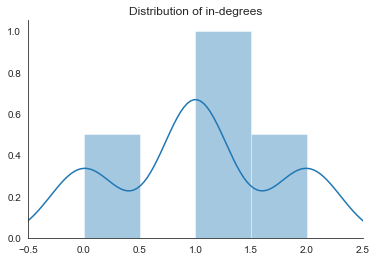

In [399]:
analyze_in_degrees(data)

#### **Out-degrees**
This section is concerned with analyzing the out-degrees of the nodes. An out-degree refers to the number of outgoinng edges that a node has.
___
The `analyze_out_degrees` function analyzes the matrix and prints some data on the out-degrees of the graph. This includes a distribution of the out-degrees as well as the average number of out-degrees.

In order to do this the function uses the following parameters:
  * `data` - the prepped data

In [400]:
def analyze_out_degrees(data):
    out_degrees = compute_x_degrees(data,'out')
    
    # Distribution
    plot_distribution(out_degrees,title='Distribution of out-degrees')
    
    # Averages
    average_zero = compute_average(out_degrees,ignore_zero=False)
    average_nonzero = compute_average(out_degrees,ignore_zero=True)
    print("The average out-degree (including zeros): " + str(average_zero))
    print("The average out-degree (excluding zeros): " + str(average_nonzero))

The following snippet triggers the out-degree analysis

The average out-degree (including zeros): 1.0
The average out-degree (excluding zeros): 2.0


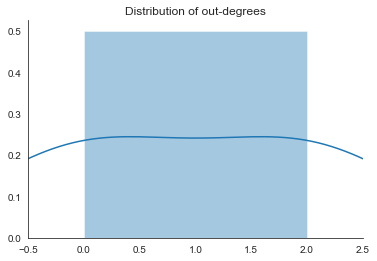

In [401]:
analyze_out_degrees(data)

In [241]:
# TODO REMOVE ME I AM TEMPORARY!
no_dead_ends = [[0,2],[1,2],[0,3],[2,1],[2,3],[3,1],[3,0]]
one_dead_end = [[0,2],[0,3],[2,1],[2,3],[3,1],[3,0]]
two_dead_ends = [[0,2],[0,3],[2,1],[2,3]]
# temp_data = no_dead_ends
# temp_data = one_dead_end
temp_data = two_dead_ends
temp_data = np.array(temp_data)
c = temp_data[:,0]
r = temp_data[:,1]
d = np.ones(len(c))
max_c = 4
print(temp_data)
temp_data = csr_matrix((d,(r,c)), shape=(max_c, max_c), dtype=np.uint16)
scipy.sparse.save_npz('prepped_data',temp_data)
data = load_prepped_data()
analyze_dead_ends(data)

[[0 2]
 [0 3]
 [2 1]
 [2 3]]
{0, 1, 2, 3}
{0, 2}
{1, 3}
There are 2 dead ends.
The following set contains all nodes classified as dead ends [in consecutive numbering].
{1, 3}


In [242]:
temp_data.todense()

matrix([[0, 0, 0, 0],
        [0, 0, 1, 0],
        [1, 0, 0, 0],
        [1, 0, 1, 0]], dtype=uint16)